In [1]:
import os
import sys
import pandas as pd
#import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.patches import Patch
# Build an absolute path from this notebook's parent directory
module_path = os.path.abspath(os.path.join('..', 'src'))
print(module_path)
# Add to sys.path if not already present
if module_path not in sys.path:
    sys.path.append(module_path)
print(module_path)
# Now you can import the desired function or class
from graph_helpers import *
from helpers import *
from mod_si import *
from plots import *
from find_net_stats import *

/nfs/nfs9/home/nobackup/vakrao/nz_model/src
/nfs/nfs9/home/nobackup/vakrao/nz_model/src


In [2]:
inc_fp = "../params/new_psa.csv"
inc_all = pd.read_csv(inc_fp)
inc_real = list(inc_all["Delta Orchard"])
cum_dat = list(inc_all["Cumulative Orchards"])

# Vary D for best config

In [3]:
vd = "../src/V_A/V_A_vd_s.csv"
vd_s_dat = pd.read_csv(vd)
vd_s_dat = vd_s_dat.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','D':'D (Seasonal)'})
month_x = {0:"None",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
vd_s_dat["Months"] = [month_x[i] for i in list(vd_s_dat["Months"])]
vd_s_dat["Network Type"] = ["Seasonal" for i in list(vd_s_dat["Months"])]

In [4]:
net_file = "../params/horticulture365_check_NZ.csv"
prop_fp = "../params/2024_prop_dat.csv"
prop_size = read_property_data(prop_fp)
inc_fp  = "../params/new_psa.csv"
post_fp = "sent_post.csv"
in_bond,out_bond = read_network_data(net_file)
eps,pct = 30,.0.8
season_real = find_best_config(all_s,real_inc_fp,s_agg,eps,pct)
s_bb,s_bw,s_s = season_real["b_b"],season_real["b_w"],season_real["seed"]
vd_s_dat = vd_s_dat[vd_s_dat["seed"] == s_s]

In [13]:
grouped_dat  = vd_s_dat.groupby(["D (Seasonal)"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
for name,group in grouped_dat:        
    param_cuml = list(group['Cumulative Infections'])
    D = float(name[0])
    for i,p in enumerate(param_cuml):
        if p > 2: 
            print("Outbreak start for : ",D," is :",i)
            break
    max_val = 0
    time = 0
    for i,p in enumerate(calc_month_incidence(param_cuml)):
        if p > max_val:
            max_val = p
            time = i
    print("Max incidence is: ",max_val," at month: ",time)
    print("Cumulative infections for: ",D," is :",param_cuml[-1])
    param_inc = calc_month_incidence(param_cuml)
    param_inc = param_inc[0:]
    inc_dat = inc_dat + param_inc
vd_s_dat["Incidence"] = inc_dat
vd_s_dat = vd_s_dat[vd_s_dat["Months"] != "None"]

Outbreak start for :  0.2  is : 1
Max incidence is:  316.0  at month:  8
Cumulative infections for:  0.2  is : 1279.0
Outbreak start for :  0.4  is : 2
Max incidence is:  245.0  at month:  8
Cumulative infections for:  0.4  is : 1259.0
Outbreak start for :  0.6  is : 2
Max incidence is:  246.0  at month:  9
Cumulative infections for:  0.6  is : 1240.0
Outbreak start for :  0.8  is : 2
Max incidence is:  307.0  at month:  9
Cumulative infections for:  0.8  is : 1219.0


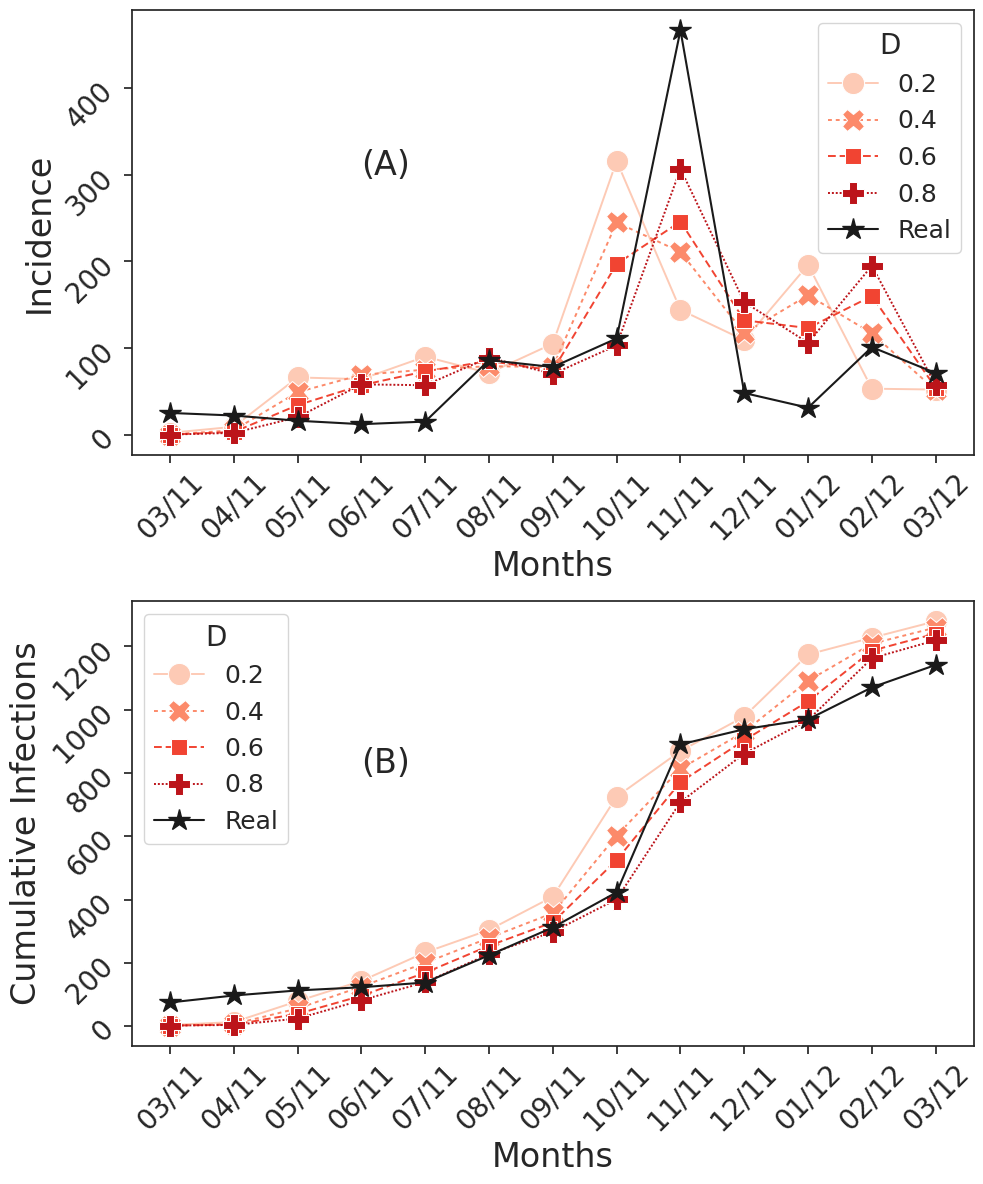

In [18]:
#seas_palette = ["#fdae6b", "#ff7f00", "#d65f00", "#a34700"]
#seas_palette = ['#F4A582', '#FD8D3C', '#D95F0E', '#993404']
pruned_month = {0:"03/11",1:"04/11",2:"05/11",3:"06/11",4:"07/11",5:"08/11",6:"09/11",7:"10/11",8:"11/11",9:"12/11",10:"01/12",11:"02/12",12:"03/12"}

mark_size = 16
lw_thick = 1.4
seas_palette = {0.2: '#F4A582',0.4: '#FD8D3C',0.6: '#D95F0E',0.8: '#993404'}
seas_palette = sns.color_palette("Reds", n_colors=4)
#seas_palette = "cividis"
dashes = {0.2: '',0.4: (2,2),0.6: (4,2),0.8: (1,1)}
line_x,line_y = 10,12
f,axs= plt.subplots(2,1,figsize=(line_x,line_y),tight_layout=True)
#axs.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.3)
sns.set(rc={"figure.figsize":(line_x, line_y)}) #width=6, height=5
axs[0].set_facecolor('white') # Set axes background to white
axs[1].set_facecolor('white') # Set axes background to white
#plt.rcParams.update({'font.size': 30})
axs[0].tick_params(rotation=45,labelsize=20)
axs[0].set_xlabel(xlabel="Months",fontsize=24)
axs[0].set_xlabel(xlabel="Months",fontsize=24)
axs[0].set_ylabel(ylabel="Incidence",fontsize=24)
axs[1].set_ylabel(ylabel="Cumulative Infections",fontsize=24)
axs[1].tick_params(rotation=45,labelsize=20)
axs[1].set_xlabel(xlabel="Months",fontsize=24)
sns.lineplot(vd_s_dat,x="Months",y="Incidence",ax=axs[0],style="D (Seasonal)",hue="D (Seasonal)",palette=seas_palette,dashes=dashes,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.lineplot(vd_s_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="D (Seasonal)",hue="D (Seasonal)",palette=seas_palette,dashes=dashes,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.set_style("ticks")

axs[0].plot(list(pruned_month.keys()),inc_real[1:],marker="*",ms=mark_size,color="k",label="Real")
axs[1].plot(list(pruned_month.keys()),cum_dat[1:],marker="*",ms=mark_size,color="k",label="Real")
axs[0].legend(title="D",title_fontsize=20,fontsize=18)
axs[1].legend(title="D",title_fontsize=20,fontsize=18)
axs[0].annotate("(A)",(3,300),fontsize=24)
axs[1].annotate("(B)",(3,800),fontsize=24)
plt.savefig("figs/vary_D.png")

# Vary L

In [ ]:
vl = "../src/V_A/V_A_vl_s.csv"
vl_s_dat = pd.read_csv(vl)
vl_s_dat = vl_s_dat.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"02/11",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
vl_s_dat["Months"] = [month_x[i] for i in list(vl_s_dat["Months"])]
vl_s_dat["Network Type"] = ["Seasonal" for i in list(vl_s_dat["Months"])]

In [ ]:
net_file = "../params/horticulture365_check_NZ.csv"
prop_fp = "../params/2024_prop_dat.csv"
prop_size = read_property_data(prop_fp)
inc_fp  = "../params/new_psa.csv"
post_fp = "sent_post.csv"
in_bond,out_bond = read_network_data(net_file)
season_real = find_best_config(all_s,real_inc_fp,s_agg,eps,pct)
s_bb,s_bw,s_s = season_real["b_b"],season_real["b_w"],season_real["seed"]
#s_bb,s_bw,s_s = .03,.08,21729
vl_s_dat = vl_s_dat[vl_s_dat["seed"] == s_s]

In [ ]:
grouped_dat  = vl_s_dat.groupby(["L"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
for name,group in grouped_dat:
    param_cuml = list(group['Cumulative Infections'])
    D = float(name[0])
    peak_val = 0
    param_inc = calc_month_incidence(param_cuml)

    for i,p in enumerate(param_cuml):
        if p > 2: 
            print("Outbreak start for : ",D," is :",i)
            break
    print("Cumulative infections for: ",D," is :",param_cuml[-1])
    print("max incidence is: ",max(param_inc))
    param_inc = param_inc[1:]
    inc_dat = inc_dat + param_inc
vl_s_dat["Incidence"] = inc_dat

In [ ]:
#seas_palette = ["#fdae6b", "#ff7f00", "#d65f00", "#a34700"]
#seas_palette = ['#F4A582', '#FD8D3C', '#D95F0E', '#993404']
mark_size = 16
lw_thick = 1.4
l_palette = sns.color_palette("Oranges", n_colors=7)
line_x,line_y = 10,12
f,axs= plt.subplots(2,1,figsize=(line_x,line_y),tight_layout=True)
#axs[0].set_facecolor('white') 
#axs[1].set_facecolor('white') 
#sns.set(rc={"figure.figsize":(line_x, line_y)}) #width=6, height=5
#axs[0].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
#axs[1].grid(color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
axs[0].tick_params(rotation=45)
axs[1].tick_params(rotation=45)
axs[0].tick_params(rotation=45,labelsize=20)
axs[0].set_xlabel(xlabel="Months",fontsize=24)
axs[0].set_xlabel(xlabel="Months",fontsize=24)
axs[0].set_ylabel(ylabel="Incidence",fontsize=24)
axs[1].set_ylabel(ylabel="Cumulative Infections",fontsize=24)
axs[1].tick_params(rotation=45,labelsize=20)
axs[1].set_xlabel(xlabel="Months",fontsize=24)
sns.lineplot(vl_s_dat,x="Months",y="Incidence",ax=axs[0],style="L",hue="L",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.lineplot(vl_s_dat,x="Months",y="Cumulative Infections",ax=axs[1],style="L",hue="L",palette=l_palette,estimator="mean",markers=True,legend=True,ms=mark_size,lw=lw_thick)
sns.set_style("ticks")

axs[0].plot(list(month_x.keys()),inc_real,marker="*",ms=mark_size,color="k",label="Real")
axs[1].plot(list(month_x.keys()),cum_dat,marker="*",ms=mark_size,color="k",label="Real")
axs[0].legend(title="L",title_fontsize=20,fontsize=18)
axs[1].legend(title="L",title_fontsize=20,fontsize=18)
#axs[0].set_facecolor('white') 
axs[0].annotate("(A)",(5,300),fontsize=24)
axs[1].annotate("(B)",(5,800),fontsize=24)
f.savefig("figs/vary_L.png")

# Varying Start Month

In [ ]:
month_dat = "../src/M_C/M_C_lin_M_D.csv"
m_bb,m_bw,m_D = .03,.09,.4
m_vsm = pd.read_csv(month_dat)
# get us what the filtered seeds were 
m_vsm = m_vsm[m_vsm['b_b'] == m_bb]
m_vsm = m_vsm[m_vsm['b_w'] == m_bw]
m_vsm = m_vsm[m_vsm['D'] == 0.4] 
print(m_vsm.columns)

In [ ]:
# filter dataset by seeds that match real data
grouped_dat  = m_vsm.groupby(["seed"])
good_seeds = set(m_vsm["seed"])
good_seeds = set()
"""
for name,group in grouped_dat:
    param_cuml = list(group['monthly_cuml'])
    param_inc = calc_month_incidence(param_cuml)
    seed = name[0]
    good_seeds.add(seed)
    #if filter_seeds(param_inc,real_inc,eps,pct) == True:
    #    good_seeds.add(seed)
"""         
print(len(good_seeds))

In [ ]:
month_vsm = "../src/V_A/V_A_vsm_m.csv"
month_vsm = pd.read_csv(month_vsm)
month_vsm = month_vsm.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"02/11",1:"03/11",2:"04/11",3:"05/11",4:"06/11",5:"07/11",6:"08/11",7:"09/11",8:"10/11",9:"11/11",10:"12/11",11:"01/12",12:"02/12",13:"03/12"}
month_vsm["Months"] = [month_x[i] for i in list(month_vsm["Months"])]
month_vsm["Network Type"] = ["Seasonal" for i in list(month_vsm["Months"])]
season = {12:"SM",1:"SM",2:"SM",3:"AT",4:"AT",5:"AT",6:"WT",7:"WT",8:"WT",9:"SP",10:"SP",11:"SP"}
#month_vsm["Season"] = [season[s] for s in list(month_vsm["sm"])]
month_vsm = month_vsm.rename(columns={'monthly_cuml':'Cumulative Infections','months':'Months','shift':'L'})
month_x = {0:"1",1:"2",2:"3",3:"4",4:"5",5:"6",6:"7",7:"8",8:"9",9:"10",10:"11",11:"12",12:"13",13:"14"}
month_vsm = month_vsm[month_vsm["seed"].isin(good_seeds)]

In [ ]:
# filter dataset by seeds that match real data
grouped_dat  = month_vsm.groupby(["sm","seed","alpha"])
seed_rmse = []
real_inc = pd.read_csv(inc_fp)
real_inc = list(real_inc["Delta Orchard"])
seed_configs = []
counter = 0
inc_dat = []
peak_sm,os_sm,tp_sm,st_sm,prob_out = {},{},{},{},{}
for i in range(1,13):
    peak_sm[i] = []
    os_sm[i] = []
    tp_sm[i] = []
    st_sm[i] = []
    prob_out[i] = 0

for name,group in grouped_dat:
    sm,seed,alpha = name[0],name[1],name[2]
    if seed in good_seeds and alpha == 0.1:
        param_cuml = list(group['Cumulative Infections'])
        found_st = False
        for i,p in enumerate(param_cuml):
            if p >= 2 and found_st == False: 
                st_sm[sm].append(i)
                found_st = True
        os_sm[sm].append(param_cuml[-1])
        if param_cuml[-1] > 30:
            prob_out[sm] += 1
        D = float(name[0])
        param_inc = calc_month_incidence(param_cuml)
        max_p = max(param_inc)
        peak_sm[sm].append(max_p)
        for i,p in enumerate(param_inc):
            if p == max_p:
                tp_sm[sm].append(i)
                break
        
        inc_dat = inc_dat + param_inc
#month_vsm["Incidence"] = inc_dat

In [ ]:
full_os_data = os_sm

In [ ]:
x_vals = list(peak_sm.keys())
peak_std,os_mn,os_std,tp_std,st_std = {},{},{},{},{}
for p in peak_sm:
    prob_out[p] = prob_out[p]/len(os_sm[p])
    peak_std[p] = np.std(peak_sm[p])
    peak_sm[p] = np.mean(peak_sm[p])
    os_std[p] = np.std(os_sm[p])
    os_mn[p] = np.mean(os_sm[p])
    tp_std[p] = np.std(tp_sm[p])
    tp_sm[p] = np.mean(tp_sm[p])
    st_std[p] = np.std(st_sm[p])
    st_sm[p] = np.mean(st_sm[p])
peak_months = {}
start_months = {}
peak_next_year = []
st_next_year = []
for x in tp_sm:
    peak_val = round(tp_sm[x])
    os_start = round(st_sm[x])
    peak_month = peak_val + x
    peak_start = os_start + x
    if (peak_month) > 12:
        peak_month = round(peak_month - 12)
        peak_next_year.append(True)
    else:
        peak_next_year.append(False)
    if (peak_start) > 12:
        peak_start = round(peak_start -12)
        st_next_year.append(True)
    else:
        st_next_year.append(False)
    peak_months[x] = peak_month   
    start_months[x] = peak_start

# Convert to lists
month = {1:"Jan",2:"Feb",3:"Mar",4:"Apr",5:"May",6:"Jun",7:"Jul",8:"Aug",9:"Sep",10:"Oct",11:"Nov",12:"Dec"}

peak_vals = [peak_sm[m] for m in x_vals]
os_vals = [os_mn[m] for m in x_vals]
#tp_vals = [int(peak_months[m]) for m in x_vals]
#tp_vals = [month[m] for m in tp_vals]
tp_vals = [int(peak_months[m]) for m in x_vals]  # 1..12 numeric positions
st_vals = [int(start_months[m]) for m in x_vals]
peak_stds = [peak_std[m] for m in x_vals]
os_stds = [os_std[m] for m in x_vals]
tp_stds = [tp_std[m] for m in x_vals]
st_stds = [st_std[m] for m in x_vals]

In [ ]:
# 0) Filter seeds first (keep all alphas so you can compare them)
filtered = month_vsm[month_vsm["seed"].isin(good_seeds)].copy()
filtered = filtered[filtered["alpha"] == 0.1]

# 1) Get the last row per (alpha, sm, seed)
# Create a within-group index (0..T-1), then pick the max index row
filtered["t"] = filtered.groupby(["alpha", "sm", "seed"]).cumcount()
last_rows_idx = filtered.groupby(["alpha", "sm", "seed"])["t"].idxmax()
last_rows = filtered.loc[last_rows_idx, ["alpha", "sm", "seed", "Cumulative Infections"]]
# 2) Aggregate across seeds to get one value per (alpha, sm)
os_mean = (last_rows
           .groupby(["alpha", "sm"])["Cumulative Infections"]
           .mean()
           .reset_index())
# 3) Prepare month order and labels
sm_order = list(range(1, 13))  # 1..12 start months
month_labels = ["Dec","Jan","Feb","Mar","Apr","May","Jun",
                "Jul","Aug","Sep","Oct","Nov"]

# Pivot to columns = alpha, rows = sm (ordered 1..12)
os_piv = (os_mean
          .pivot(index="sm", columns="alpha", values="Cumulative Infections")
          .reindex(sm_order))  # ensure Jan..Dec order
#os_std  = os_stats.pivot(index="sm", columns="alpha", values="std").reindex(sm_order)
alphas = list(os_piv.columns)  # your 3 alpha values from the data
x = np.arange(len(sm_order))
bar_width = 0.8 / max(1, len(alphas))  # fit groups nicely

In [ ]:
# Mean and std of final outbreak size (last value per seed)
os_stats = (last_rows
            .groupby(["alpha", "sm"])["Cumulative Infections"]
            .agg(['mean','std'])
            .reset_index())
# Pivot to separate alpha columns
os_mean = os_stats.pivot(index="sm", columns="alpha", values="mean").reindex(sm_order)
os_std  = os_stats.pivot(index="sm", columns="alpha", values="std").reindex(sm_order)

In [ ]:
def reorder_axes(month_vals,x_vals,next_year):
    start_counter = 0
    for i,n in enumerate(next_year):
        if n == True:
            start_counter=  i
            break
    reorder_vals = month_vals[start_counter:] + month_vals[:start_counter]
    reorder_mths = x_vals[start_counter:] + x_vals[:start_counter]
    return reorder_vals,reorder_mths

In [ ]:
x_vals = ["Dec","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov"]
reord_st,reord_st_x = reorder_axes(st_vals,x_vals,st_next_year)
reord_peak,reord_peak_x =  reorder_axes(tp_vals,x_vals,peak_next_year)
print(st_sm)
print(tp_sm)
reord_st_val,_ = reorder_axes(list(st_sm.values()),x_vals,st_next_year)
reord_tp_val,_ =  reorder_axes(list(tp_sm.values()),x_vals,peak_next_year)

In [ ]:
def adjacent_values(vals, q1, q3):
    upper_adjacent_value = q3 + (q3 - q1) * 1.5
    upper_adjacent_value = np.clip(upper_adjacent_value, q3, vals[-1])

    lower_adjacent_value = q1 - (q3 - q1) * 1.5
    lower_adjacent_value = np.clip(lower_adjacent_value, vals[0], q1)
    return lower_adjacent_value, upper_adjacent_value

In [ ]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

seas_month = {"Jan":"Summer","Feb":"Summer",
              "Mar":"Fall","Apr":"Fall",
              "May":"Fall",
              "Jun":"Winter","Jul":"Winter","Aug":"Winter",
              "Sep":"Spring","Oct":"Spring","Nov":"Spring",
              "Dec":"Summer"}

#= ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
print(peak_next_year)
tp_year = ['o' for x in tp_vals]
os_year = ['o' for x in tp_vals]
annotate_x = -3.8 
for i,change in enumerate(peak_next_year):
    if change:
        tp_year[i] = 'x'
for i,change in enumerate(st_next_year):
    if change:
        os_year[i] = 'x'
print(tp_year)
summer = "#FFC20A"
fall = "#D55E00"
winter = "#0C7BDC"
spring = "#009E73"
colors  = [summer,summer,summer,fall,fall,fall,winter,winter,winter,spring,spring,spring]
tick_fs = 16
title_fs = 20
lab_fs = 18
# Create the 2x2 plot
fig, axs = plt.subplots(3, 1, figsize=(10, 16))
# Distinct, dense hatch patterns for alpha (repeat chars for density)
"""
# Draw grouped bars with seasonal colors + alpha hatches
for i, a in enumerate(alphas):
    axs[0].bar(
        x + i*bar_width,
        os_mean[a].values,
        width=bar_width,
        color=colors,
        alpha = 1, 
        #hatch=alpha_hatches[i],
        edgecolor='black',
        linewidth=0.8,      # <-- add std
        capsize=4,                  # little caps on error bars
        error_kw={'elinewidth':1.2} # make error bars more visible
    )
"""
## DRAW VIOLIN PLOT 
violin_data = [] 
for i in range(1,13):
    if i == 1: 
        violin_data.append(full_os_data[12])
    if i != 12:
        violin_data.append(full_os_data[i])
    
violin_parts = axs[0].violinplot(violin_data,showmeans=False, showmedians=False,
        showextrema=False,bw_method='silverman')
counter = 0 
for pc in violin_parts['bodies']:
    pc.set_facecolor(colors[counter])
   # pc.set_edgecolor('k')
    pc.set_alpha(1)
    counter += 1
#violin_parts['cmeans'].set_color('black')
quartile1, medians, quartile3 = np.percentile(violin_data, [25, 50, 75], axis=1)
whiskers = np.array([
    adjacent_values(sorted_array, q1, q3)
    for sorted_array, q1, q3 in zip(violin_data, quartile1, quartile3)])


#whiskers_min, whiskers_max = whiskers[:, 0], whiskers[:, 1]
inds = np.arange(1, len(medians) + 1)
axs[0].scatter(inds, medians, marker='o', color='white', s=30, zorder=3)
axs[0].vlines(inds, quartile1, quartile3, color='k', linestyle='-', alpha=0.6,lw=4)
#axs[0].vlines(inds, whiskers_min, whiskers_max, color='k', linestyle='-', lw=1)
print(whiskers_min,whiskers_max)
axs[0].set_xticklabels(x_vals)
# Center ticks
#axs[0].set_xticks(x + (len(alphas)-1)*bar_width/2)
#axs[0].set_xticklabels(month_labels, rotation=45)

axs[0].set_title("Final Outbreak Size", size=title_fs)
axs[0].set_ylabel("Cumulative Infections", size=lab_fs)
axs[0].tick_params(labelsize=tick_fs)
axs[0].annotate("(A)", (-0.3, 0.6), xycoords="axes fraction", fontsize=24,annotation_clip=False)


# --- Legend 2: Seasons (color only)
# Map your seasonal colors to labels (adjust if your mapping differs)
season_colors = {
    "Summer": "#FFC20A",
    "Fall":   "#D55E00",
    "Winter": "#0C7BDC",
    "Spring": "#009E73",
}

season_handles = [
    Patch(facecolor=c, edgecolor='black', label=lab)
    for lab, c in season_colors.items()
]


# Season legend (colors) below the alpha legend (also outside)
leg_season = axs[0].legend(
    handles=season_handles, title="Season",
    loc="center left", bbox_to_anchor=(1.02, 0.30),
    frameon=True, framealpha=0.95, borderaxespad=0.0
)
#axs[0].set_xticks(x + (len(alphas)-1)*bar_width/2)  # center tick under group
axs[0].set_xticks(np.arange(1, len(month_labels) + 1), labels=month_labels,rotation=45)
#axs[0].set_xticklabels(month_labels, rotation=45)
axs[0].set_title("Final Outbreak Size", size=title_fs)
axs[0].set_ylabel("Cumulative Infections", size=lab_fs)
axs[0].set_xlabel("Importation Month (C)", size=lab_fs)
axs[0].tick_params(labelsize=tick_fs)

# Peak Timing
peak_colors = [season_colors[seas_month[m]] for m in reord_peak_x] 
#axs[1].scatter(reord_peak_x, reord_peak, marker="o",color=peak_colors)
axs[1].plot(reord_peak_x, reord_peak,color="grey")
axs[1].set_title('Timing of Peak',size=title_fs)
axs[1].set_ylabel('Month of Peak',size=lab_fs)
axs[1].set_facecolor('white') # Set axes background to white
axs[1].set_facecolor('white') # Set axes background to white
ins_ax1 = inset_axes(axs[1], width="35%", height="35%", bbox_to_anchor=(1, 1, 11, 11),
                    bbox_transform=axs[1].transData, loc="upper left", borderpad=0)
ins_ax1.bar(reord_peak_x,reord_tp_val,color=peak_colors)
ins_ax1.tick_params(labelsize=10,rotation=45)
ins_ax1.set_ylabel("Months till Peak")
axs[1].tick_params(rotation=45,labelsize=tick_fs)
axs[1].set_xlabel("Importation Month (C)", size=lab_fs)
axs[1].annotate("(B)",(annotate_x,8),fontsize=24,annotation_clip=False)
axs[1].set_ylim(0.5, 12.5)  # so Jan/Dec aren’t squished on the frame
axs[1].set_yticklabels(x_vals)

# Onset Time
st_colors = [season_colors[seas_month[m]] for m in reord_st_x] 
#axs[2].scatter(reord_st_x, reord_st,marker="o",color=st_colors)
axs[2].plot(reord_st_x, reord_st,color="grey")
axs[2].set_title('Onset Time',size=title_fs)
axs[2].set_ylabel('Onset Month',size=lab_fs)
axs[2].set_facecolor('white') # Set axes background to white
axs[2].set_facecolor('white') # Set axes background to white
axs[2].tick_params(rotation=45,labelsize=tick_fs)
axs[2].set_xlabel("Importation Month (C)", size=lab_fs)
axs[2].annotate("(C)",(annotate_x,8),fontsize=24,annotation_clip=False)
ins_ax2 = inset_axes(axs[2], width="35%", height="35%", bbox_to_anchor=(1, 1, 11, 11),
                    bbox_transform=axs[2].transData, loc="upper left", borderpad=0)
print(reord_st)
ins_ax2.bar(reord_st_x,reord_st_val,color=st_colors)
ins_ax2.tick_params(labelsize=10,rotation=45)
ins_ax2.set_ylabel("Months till Onset")

axs[2].set_ylim(0.5, 12.5)  # so Jan/Dec aren’t squished on the frame
axs[2].set_yticklabels(x_vals)

# Probability of Outbreak Occuring
probs = list(prob_out.values())
probs = [round(p,2) for p in probs]
# Shared x-axis settings
#for ax in axs.flat:
#    ax.set_xlabel('Start Month')
#    ax.set_xticks(x_vals)
sns.set_style("ticks")
axs[1].set_yticks(range(1, 13), x_vals)
axs[2].set_yticks(range(1, 13), x_vals)

plt.rcParams.update({'font.size': 20})
plt.tight_layout()
plt.savefig("figs/final_size.png")
plt.show()